In [11]:
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [267]:
def apply_prewitt(image):
    # Define Prewitt kernels
    kernel_x = np.array([[1, 0, -1],
                         [1, 0, -1],
                         [1, 0, -1]])
    
    kernel_y = np.array([[1, 1, 1],
                         [0, 0, 0],
                         [-1, -1, -1]])
    
    # Apply the kernels to the grayscale image
    prewitt_x = cv2.filter2D(image, -1, kernel_x)
    prewitt_y = cv2.filter2D(image, -1, kernel_y)
    
    # Combine the horizontal and vertical edges
    prewitt = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)
    
    return prewitt, prewitt_x, prewitt_y

def apply_sobel(image):
    # Apply Sobel filter to detect edges in the x and y directions
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Convert back to uint8
    sobel_x = np.uint8(np.absolute(sobel_x))
    sobel_y = np.uint8(np.absolute(sobel_y))
    
    # Combine the horizontal and vertical edges
    sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)
    
    return sobel_combined, sobel_x, sobel_y

def apply_roberts(image):
    # Define Roberts cross operator kernels
    kernel_x = np.array([[1, 0],
                         [0, -1]])
    
    kernel_y = np.array([[0, 1],
                         [-1, 0]])
    
    # Apply the kernels to the grayscale image
    roberts_x = cv2.filter2D(image, -1, kernel_x)
    roberts_y = cv2.filter2D(image, -1, kernel_y)
    
    # Combine the horizontal and vertical edges
    roberts_combined = np.sqrt(roberts_x**2 + roberts_y**2)
    roberts_combined = (roberts_combined / roberts_combined.max() * 255).astype(np.uint8)
    
    return roberts_combined, roberts_x, roberts_y

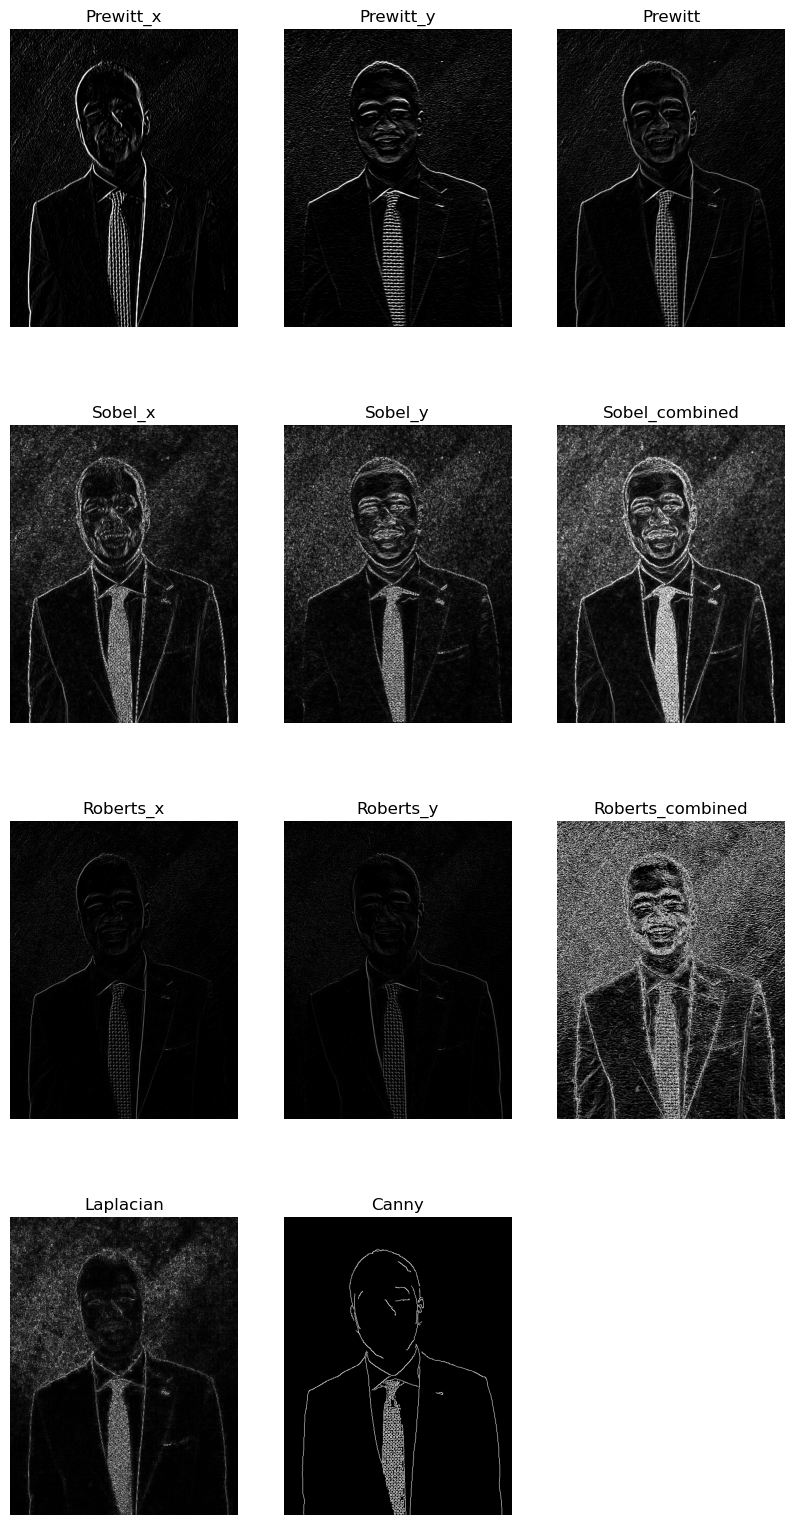

In [273]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('E:/me.jpg')
if image is None:
    raise ValueError("Image not found or unable to load")

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

canny = cv2.Canny(gray_image, 250, 600)

prewitt, prewitt_x, prewitt_y = apply_prewitt(gray_image)

sobel_combined, sobel_x, sobel_y = apply_sobel(gray_image)

roberts_combined, roberts_x, roberts_y = apply_roberts(gray_image)

# Display the original image and the Laplacian edges
plt.figure(figsize=(10, 30))

plt.subplot(6,3,1)
plt.imshow(cv2.cvtColor(prewitt_x, cv2.COLOR_BGR2RGB))
plt.title('Prewitt_x')
plt.axis('off')

plt.subplot(6,3,2)
plt.imshow(cv2.cvtColor(prewitt_y, cv2.COLOR_BGR2RGB))
plt.title('Prewitt_y')
plt.axis('off')

plt.subplot(6,3,3)
plt.imshow(cv2.cvtColor(prewitt, cv2.COLOR_BGR2RGB))
plt.title('Prewitt')
plt.axis('off')

plt.subplot(6,3,4)
plt.imshow(cv2.cvtColor(sobel_x, cv2.COLOR_BGR2RGB))
plt.title('Sobel_x')
plt.axis('off')

plt.subplot(6,3,5)
plt.imshow(cv2.cvtColor(sobel_y, cv2.COLOR_BGR2RGB))
plt.title('Sobel_y')
plt.axis('off')

plt.subplot(6,3,6)
plt.imshow(cv2.cvtColor(sobel_combined, cv2.COLOR_BGR2RGB))
plt.title('Sobel_combined')
plt.axis('off')

plt.subplot(6,3,7)
plt.imshow(cv2.cvtColor(roberts_x, cv2.COLOR_BGR2RGB))
plt.title('Roberts_x')
plt.axis('off')

plt.subplot(6,3,8)
plt.imshow(cv2.cvtColor(roberts_y, cv2.COLOR_BGR2RGB))
plt.title('Roberts_y')
plt.axis('off')

plt.subplot(6,3,9)
plt.imshow(cv2.cvtColor(roberts_combined, cv2.COLOR_BGR2RGB))
plt.title('Roberts_combined')
plt.axis('off')

plt.subplot(6,3,10)
plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
plt.title('Laplacian')
plt.axis('off')

plt.subplot(6,3,11)
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
plt.title('Canny')
plt.axis('off')

plt.show()


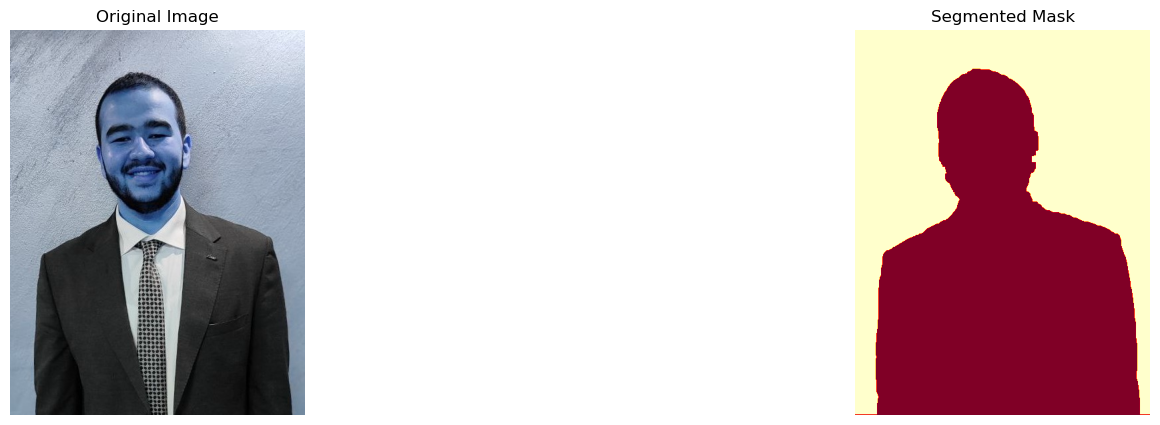

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def Semantic_Seg(img, min, max):
    image = cv2.imread(img)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray_image, min, max)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)

    segmentation_mask = np.zeros_like(gray_image)

    cv2.drawContours(segmentation_mask, contours, -1, (255), thickness=cv2.FILLED)

    kernel = np.ones((9,9), np.uint8)
    segmentation_mask = cv2.morphologyEx(segmentation_mask, cv2.MORPH_GRADIENT, kernel)

    rows, cols = segmentation_mask.shape
    segmentation_mask[rows-1] = 255

    contours, _ = cv2.findContours(segmentation_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    filled_image = np.zeros_like(segmentation_mask)

    cv2.drawContours(filled_image, contours, -1, (255), thickness=cv2.FILLED)

    return image, filled_image

path = 'E:/me.jpg'
Original, filled_image = Semantic_Seg(path, 250, 600)

plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.imshow(Original, cmap='YlOrRd')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(filled_image, cmap='YlOrRd')
plt.title('Segmented Mask')
plt.axis('off')

plt.show()